<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

Your hometown mayor just created a new data analysis team to give policy advice, and the administration recruited _you_ via LinkedIn to join it. Unfortunately, due to budget constraints, for now the "team" is just you...

The mayor wants to start a new initiative to move the needle on one of two separate issues: high school education outcomes, or drug abuse in the community.

Also unfortunately, that is the entirety of what you've been told. And the mayor just went on a lobbyist-funded fact-finding trip in the Bahamas. In the meantime, you got your hands on two national datasets: one on SAT scores by state, and one on drug use by age. Start exploring these to look for useful patterns and possible hypotheses!

---

This project is focused on exploratory data analysis, aka "EDA". EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to bad models and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those after this course!

This lab includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lesson notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like [Stack Overflow](https://stackoverflow.com/search?q=%5Bpython%5D+seaborn) that have almost certainly done what you are trying to do.

**Get used to googling for code!** You will use it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [1]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file
%matplotlib inline

# this line makes plots prettier on mac retina screens - if you don't have one it shouldn't do anything
%config InlineBackend.figure_format = 'retina'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put it in a Python dictionary

The dictionary format for data will be the column names as key, and the data under each column as the values.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```

In [2]:
with open('sat_scores.csv', 'r') as f:
    reader = csv.reader(f)
    rows = list (reader)
    
rows[:5]    

[['State', 'Rate', 'Verbal', 'Math'],
 ['CT', '82', '509', '510'],
 ['NJ', '81', '499', '513'],
 ['MA', '79', '511', '515'],
 ['NY', '77', '495', '505']]

In [3]:
header = rows[0]
body = rows [1:]

In [4]:
dict_sat = {header[i] : [body[j][i] for j in range (len(body))] for i in range(len(header))}
dict_sat

{'State': ['CT',
  'NJ',
  'MA',
  'NY',
  'NH',
  'RI',
  'PA',
  'VT',
  'ME',
  'VA',
  'DE',
  'MD',
  'NC',
  'GA',
  'IN',
  'SC',
  'DC',
  'OR',
  'FL',
  'WA',
  'TX',
  'HI',
  'AK',
  'CA',
  'AZ',
  'NV',
  'CO',
  'OH',
  'MT',
  'WV',
  'ID',
  'TN',
  'NM',
  'IL',
  'KY',
  'WY',
  'MI',
  'MN',
  'KS',
  'AL',
  'NE',
  'OK',
  'MO',
  'LA',
  'WI',
  'AR',
  'UT',
  'IA',
  'SD',
  'ND',
  'MS',
  'All'],
 'Rate': ['82',
  '81',
  '79',
  '77',
  '72',
  '71',
  '71',
  '69',
  '69',
  '68',
  '67',
  '65',
  '65',
  '63',
  '60',
  '57',
  '56',
  '55',
  '54',
  '53',
  '53',
  '52',
  '51',
  '51',
  '34',
  '33',
  '31',
  '26',
  '23',
  '18',
  '17',
  '13',
  '13',
  '12',
  '12',
  '11',
  '11',
  '9',
  '9',
  '9',
  '8',
  '8',
  '8',
  '7',
  '6',
  '6',
  '5',
  '5',
  '4',
  '4',
  '4',
  '45'],
 'Verbal': ['509',
  '499',
  '511',
  '495',
  '520',
  '501',
  '500',
  '511',
  '506',
  '510',
  '501',
  '508',
  '493',
  '491',
  '499',
  '486',
  '482',

### 1.2 Make a pandas DataFrame object with the SAT dictionary, and another with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

In [5]:
data_sat = pd.DataFrame.from_dict(dict_sat)
data_sat

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501


In [6]:
data_sat.dtypes

State     object
Rate      object
Verbal    object
Math      object
dtype: object

In [7]:
#.working on .read_csv
sat_scores = pd.read_csv('sat_scores.csv')

In [8]:
sat_scores.shape

(52, 4)

In [9]:
sat_scores.head()

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516


In [10]:
sat_scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   State   52 non-null     object
 1   Rate    52 non-null     int64 
 2   Verbal  52 non-null     int64 
 3   Math    52 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 1.8+ KB


In [11]:
#.dtypes for .read_csv
sat_scores.dtypes

State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object

In [12]:
#conlusiion:the main difference is that on they are saved from the dictionary as objects, whereas is saved as float on the other format
#read_csv the data is diplayed in a more readable manner
#

In [13]:
print(type(sat_scores['Verbal']))

<class 'pandas.core.series.Series'>


In [14]:
print(type(sat_scores[['Verbal']]))

<class 'pandas.core.frame.DataFrame'>


In [15]:
print(type(sat_scores))

<class 'pandas.core.frame.DataFrame'>


In [16]:
print(type((sat_scores)))

<class 'pandas.core.frame.DataFrame'>


If you did not convert the string column values to float in your dictionary, the columns in the DataFrame are of type `object` (which are string values, essentially). 

### 1.3 Look at the first ten rows of the DataFrame: what does our data describe?

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [17]:
sat_scores.head(10)

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

In [18]:
    
#sat_scores iformation: measure of high school outcomes in the USA
#Shape:52 rows and 4 columns   

#Variables: State, Rate, Verbal, Math
    
#Name: State 
#Type in Python: Object
#Type in stats: Cateorical    
#Description: Defines the State where the observations were made  
    
#Name: Rate
#Type in Python: Integer
#Type in Stats: Categorical (but it will be taken as continuous)
#Description: Shows students' attendance rates
    
#Name:Verbal
#Type in Python:Integer
#Type in Stats: Categorical (but it will be taken as continuous)
#Description: Shows the students' verbal scores 

#Name: Math
#Type in Python: Integer
#Type in Stats: Categorical (but it will be taken as continuous)
#Description: Shows the students' math scores 

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

In [21]:
import seaborn as sns

In [24]:
import matplotlib.pyplot as plt

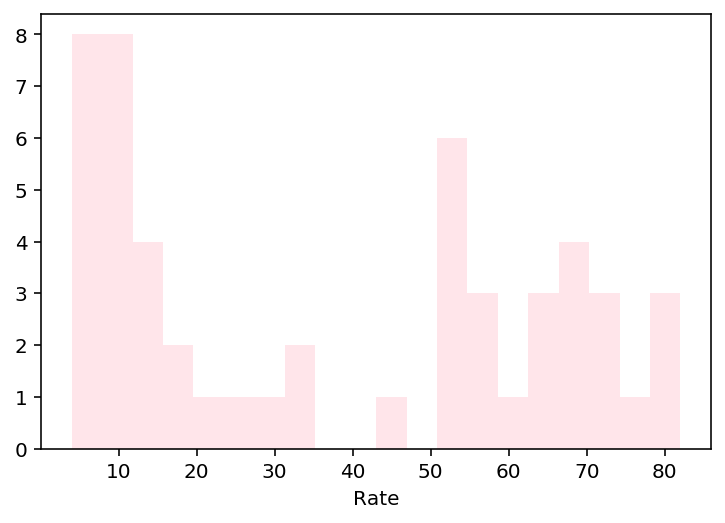

In [25]:
sns.distplot(sat_scores.Rate, color='pink', kde=False, bins=20)
plt.show()

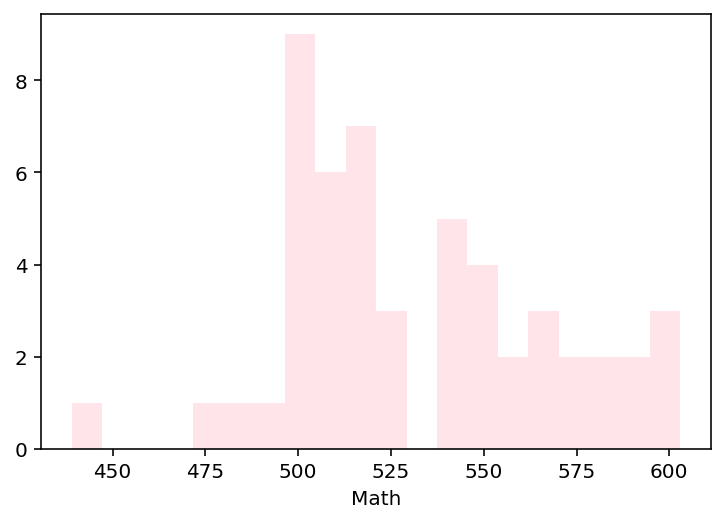

In [26]:
sns.distplot(sat_scores.Math, color='pink', kde=False, bins=20)
plt.show()

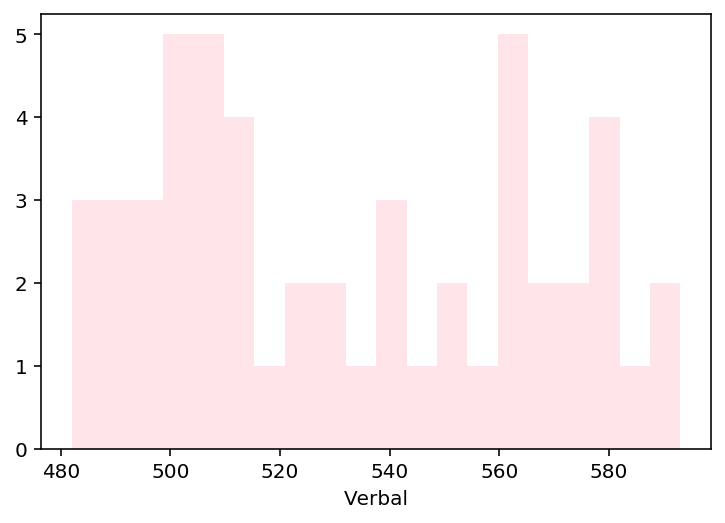

In [29]:
sns.distplot(sat_scores.Verbal, color='pink', kde=False, bins=20)
plt.show()

### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

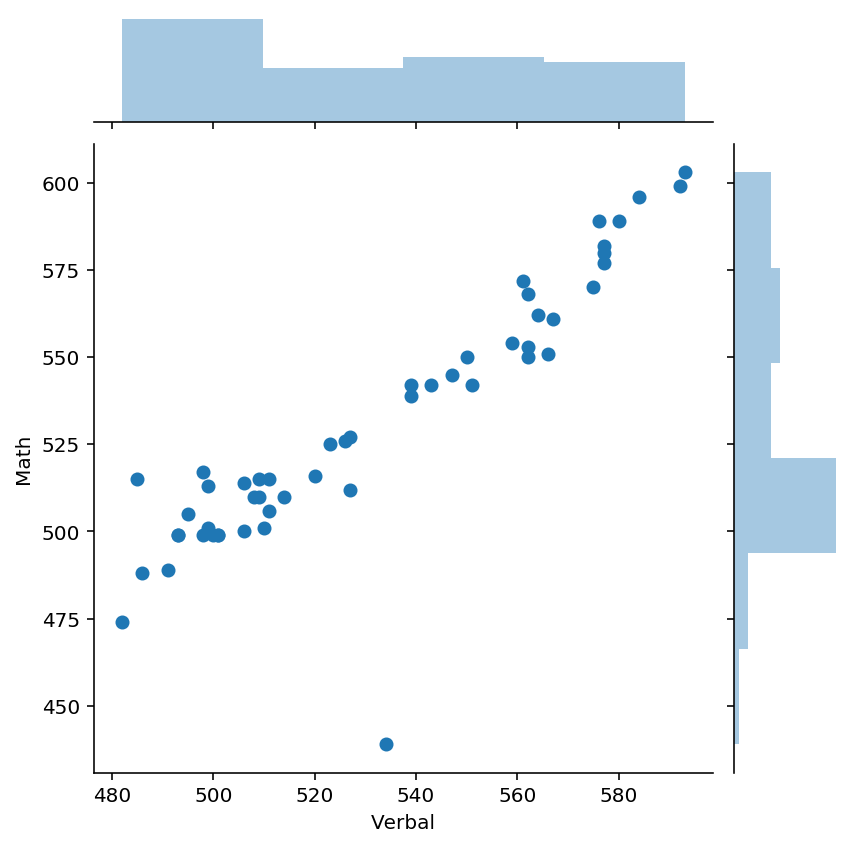

In [30]:
sns.jointplot('Verbal', 'Math', data=sat_scores)
plt.show()
#another type of comparasion

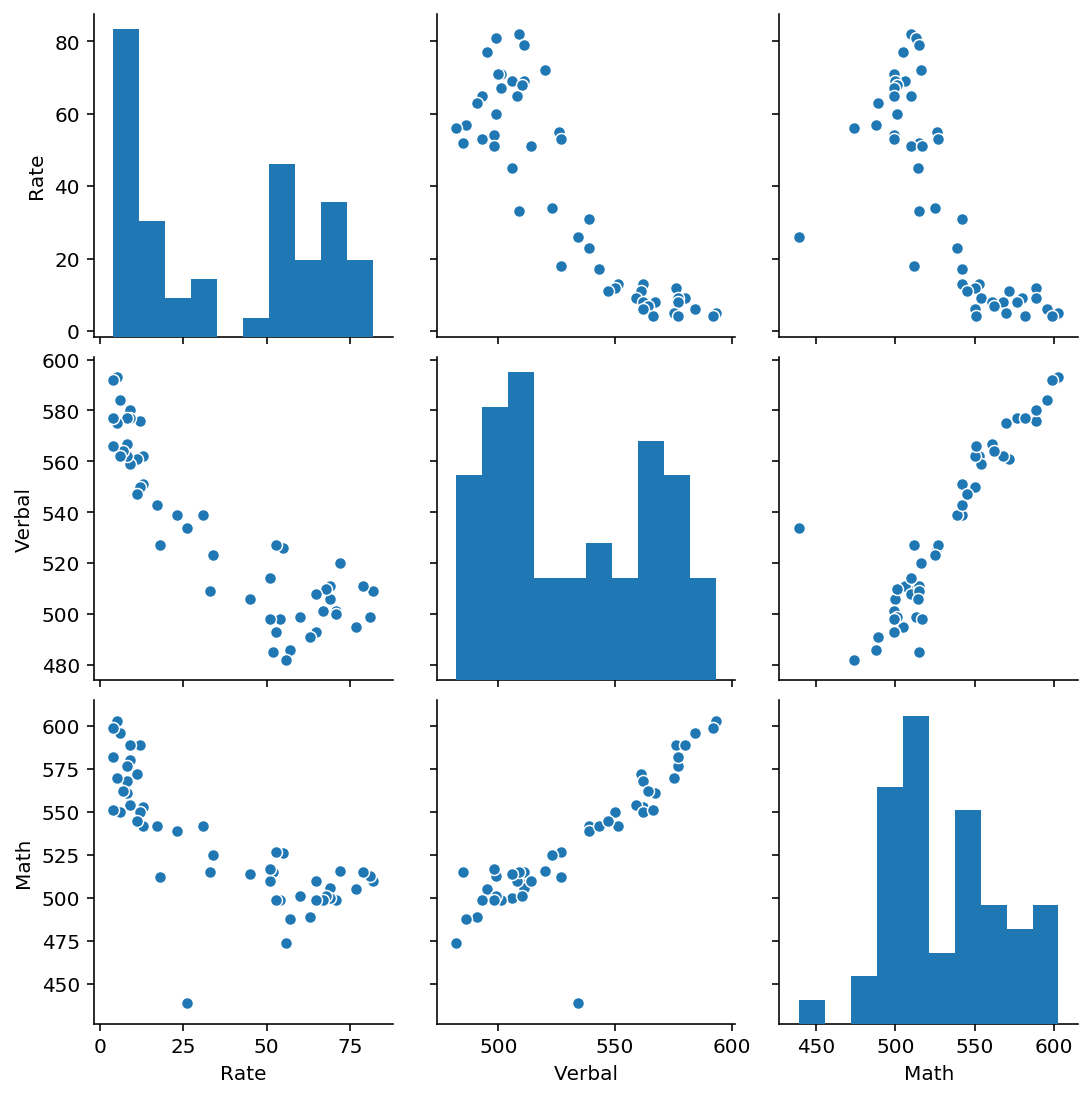

In [31]:
sns.pairplot(sat_scores)
plt.show()
########is this right?#####

In [32]:
#Conclusion: there is a positve correlation between Verbal and Math scores, 
#while there is some sort of negative correlation between Rate ad the other variables 

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built-in plotting functions for your data. Read the documentation here to understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

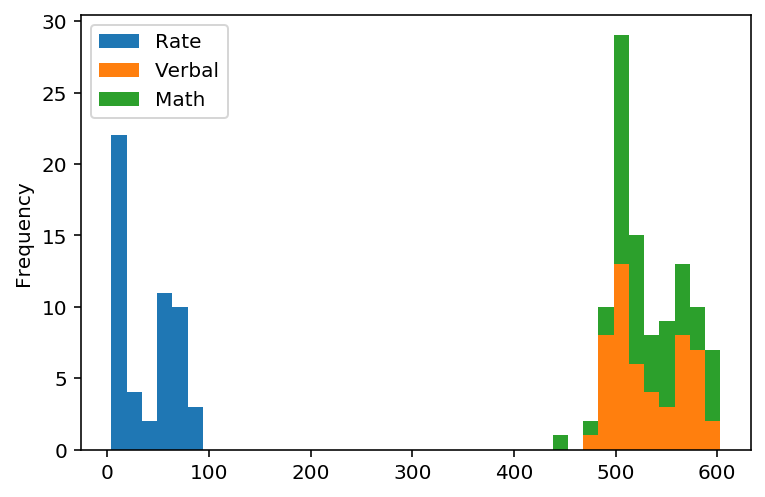

In [33]:
sat_scores.plot.hist(stacked=True, bins=40)

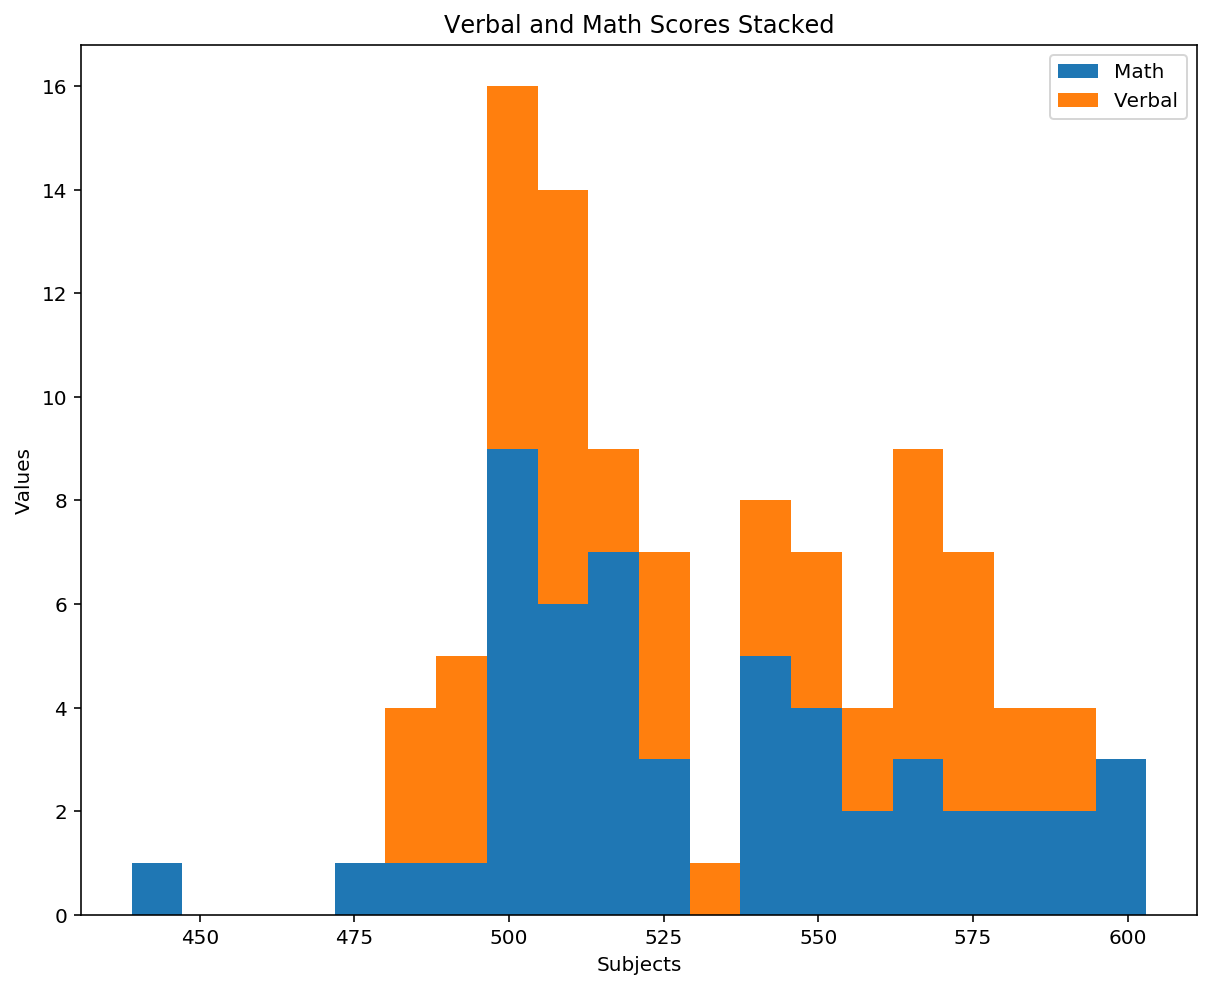

In [34]:
sat_scores[['Math', 'Verbal']].plot.hist(bins=20, stacked=True, figsize=(10, 8))
plt.title('Verbal and Math Scores Stacked')
plt.xlabel('Subjects')
plt.ylabel('Values')
plt.show()

In [35]:
sat_scores[['Math', 'Verbal']]

,Math,Verbal
0,510,509
1,513,499
2,515,511
3,505,495
4,516,520
5,499,501
6,499,500
7,506,511
8,500,506
9,501,510


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fabbc1ce090>,
      dtype=object)

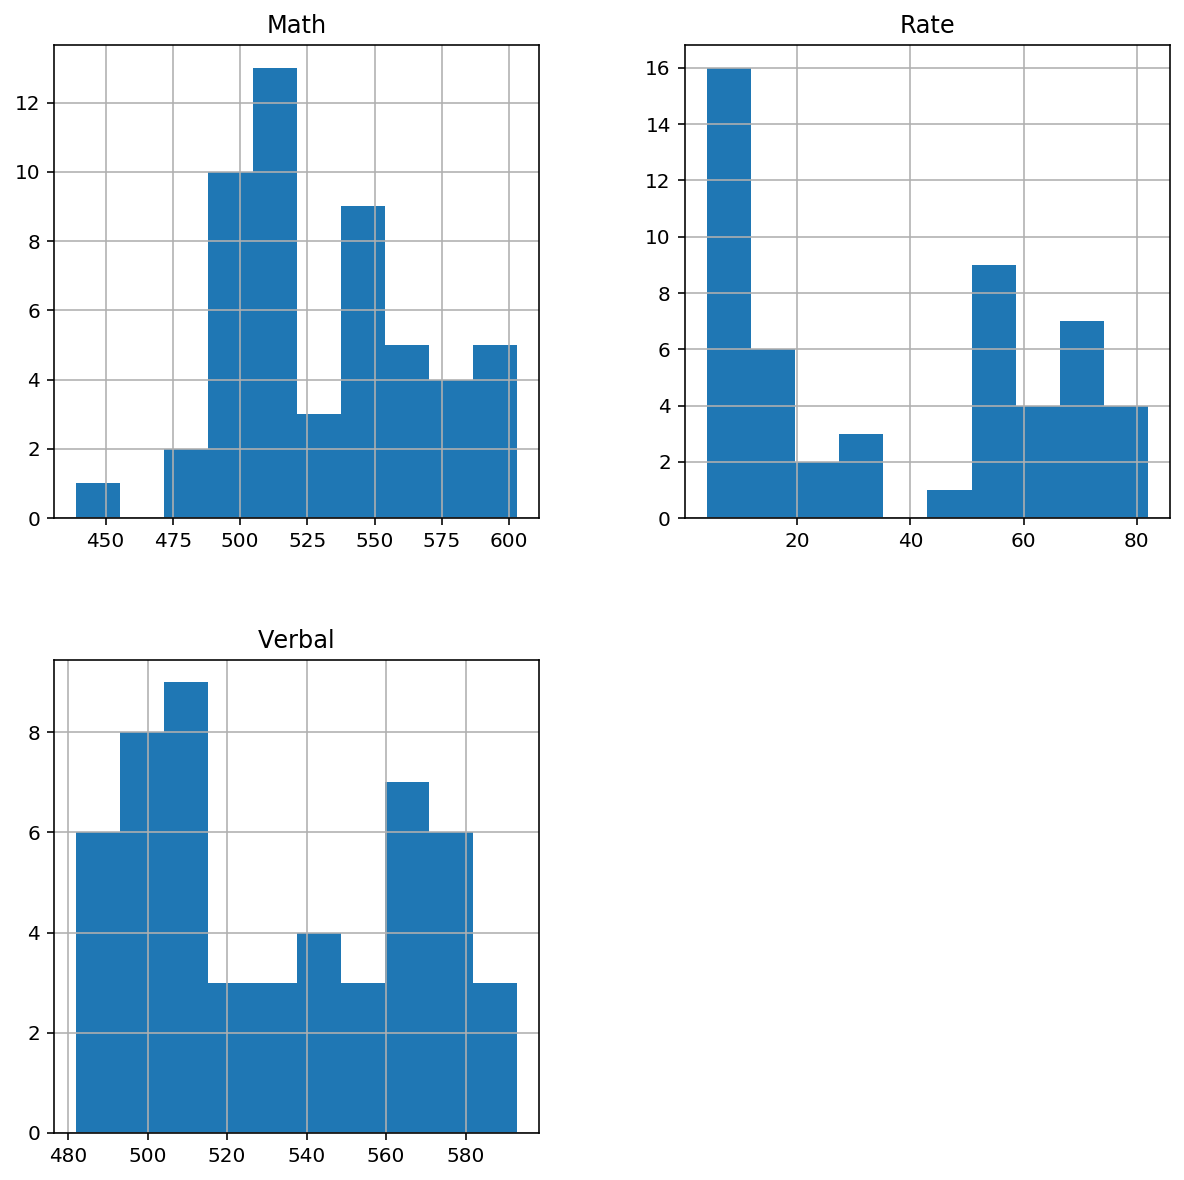

In [36]:
sat_scores.hist(figsize=(10, 10))

### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

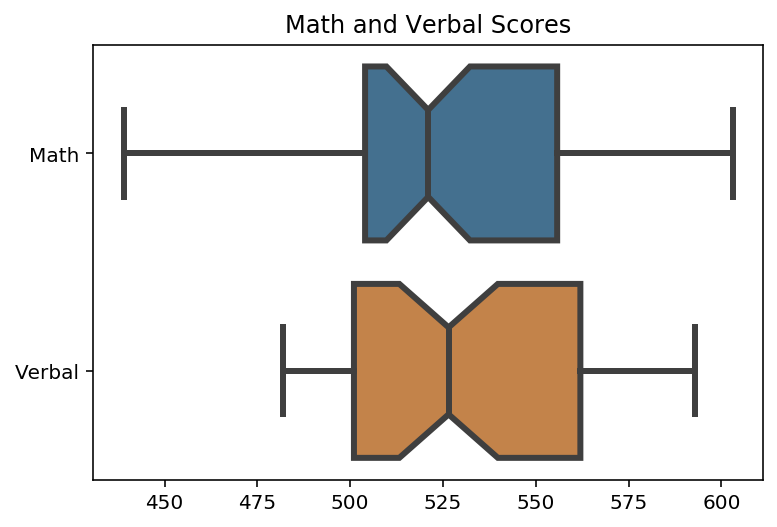

In [37]:
continuous_variables = ['Math', 'Verbal']
fig, ax = plt.subplots(figsize=(6, 4))

sns.boxplot(data=sat_scores[continuous_variables], orient='h', fliersize=5, linewidth=3, notch=True,
            saturation=0.5, ax=ax)

ax.set_title('Math and Verbal Scores')
plt.show()


In [38]:
#Conclusion: considering this data, 
#the box plot shows with more clarity the distribution around the mean

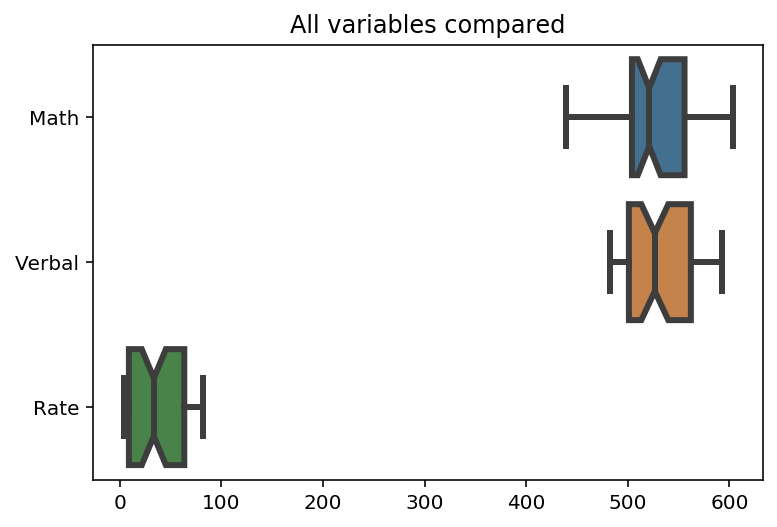

In [39]:
continuous_variables = ['Math', 'Verbal', 'Rate']
fig, ax = plt.subplots(figsize=(6, 4))

sns.boxplot(data=sat_scores[continuous_variables], orient='h', fliersize=5, linewidth=3, notch=True,
            saturation=0.5, ax=ax)

ax.set_title('All variables compared')
plt.show()

In [40]:
#Conclusion: the variables must be standarizided in order to be comparable most appropriately comparable

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


In [41]:
def var_standardized(var):
    var_stand = (var-var.mean())/var.std()
    return var_stand

In [66]:
sat_variables = ['Rate', 'Verbal', 'Math']
sat_scores_stand = var_standardized(sat_scores[sat_variables])
sat_scores_stand

,Rate,Verbal,Math
0,1.642609,-0.692595,-0.596974
1,1.605981,-0.993471,-0.513675
2,1.532726,-0.632419,-0.458143
3,1.459470,-1.113822,-0.735805
4,1.276332,-0.361630,-0.430377
5,1.239705,-0.933296,-0.902402
6,1.239705,-0.963383,-0.902402
7,1.166449,-0.632419,-0.708039
8,1.166449,-0.782858,-0.874636
9,1.129822,-0.662507,-0.846870


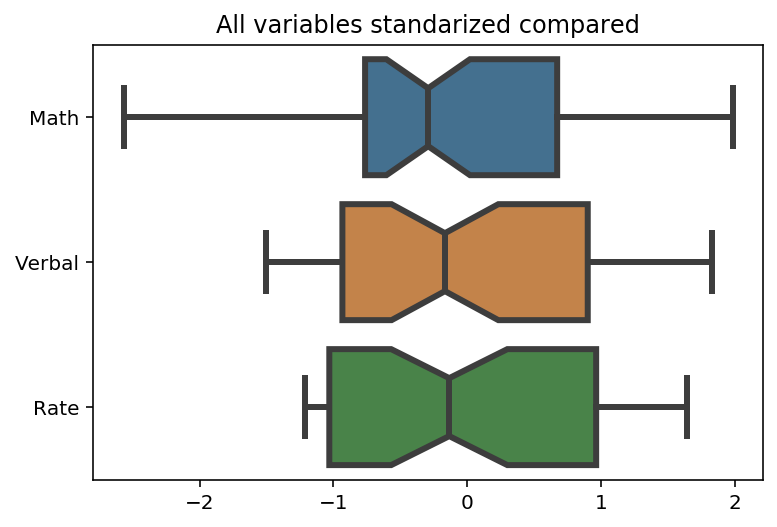

In [68]:
fig, ax = plt.subplots(figsize=(6, 4))

sns.boxplot(data=sat_scores_stand[continuous_variables], orient='h', fliersize=5, linewidth=3, notch=True,
            saturation=0.5, ax=ax)

ax.set_title('All variables standarized compared')
plt.show()

In [69]:
#once standarided, they ar now comparable

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




In [70]:
sat_scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   State                   52 non-null     object
 1   Rate                    52 non-null     int64 
 2   Verbal                  52 non-null     int64 
 3   Math                    52 non-null     int64 
 4   Diference(Verbal-Math)  52 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 2.2+ KB


In [71]:
sat_scores.describe()

,Rate,Verbal,Math,Diference(Verbal-Math)
count,52.000000,52.000000,52.000000,52.000000
mean,37.153846,532.019231,531.500000,0.519231
std,27.301788,33.236225,36.014975,15.729939
min,4.000000,482.000000,439.000000,-30.000000
25%,9.000000,501.000000,504.000000,-6.000000
50%,33.500000,526.500000,521.000000,0.000000
75%,63.500000,562.000000,555.750000,4.250000
max,82.000000,593.000000,603.000000,95.000000


In [72]:
sat_scores.mean()

Rate                       37.153846
Verbal                    532.019231
Math                      531.500000
Diference(Verbal-Math)      0.519231
dtype: float64

In [73]:
sat_scores.loc[sat_scores['Verbal']>532, ['State', 'Verbal']]

,State,Verbal
26,CO,539
27,OH,534
28,MT,539
30,ID,543
31,TN,562
32,NM,551
33,IL,576
34,KY,550
35,WY,547
36,MI,561


In [74]:
sat_scores.loc[sat_scores['Verbal']>532, ['State', 'Verbal']].count()

State     24
Verbal    24
dtype: int64

In [75]:
#Conclusion: 24 States have Verbal scores above the mean, 
#therefore not significantly skewed. it's almost perfectly a normal distribution 

### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

In [76]:
sat_scores.median()

Rate                       33.5
Verbal                    526.5
Math                      521.0
Diference(Verbal-Math)      0.0
dtype: float64

In [77]:
sat_scores.loc[sat_scores['Verbal']>526.5, ['State', 'Verbal']]

,State,Verbal
19,WA,527
26,CO,539
27,OH,534
28,MT,539
29,WV,527
30,ID,543
31,TN,562
32,NM,551
33,IL,576
34,KY,550


In [78]:
#Conclusion: 26 States have Verbal scores greater than the median.
#therefore not significantly skewed. it's almost perfectly a normal distributed
#All the States 'above the mean list' are also in 'greater than median'list 
#for this dataset there its is not possible for the normal distribution to be perfect

### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [79]:
sat_scores['Diference(Verbal-Math)'] = sat_scores.Verbal - sat_scores.Math
sat_scores.head()

,State,Rate,Verbal,Math,Diference(Verbal-Math)
0,CT,82,509,510,-1
1,NJ,81,499,513,-14
2,MA,79,511,515,-4
3,NY,77,495,505,-10
4,NH,72,520,516,4


### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [80]:
#1. 10 States
Top10 = sat_scores.sort_values(by = 'Diference(Verbal-Math)', ascending = True)
Top10.head(10)

,State,Rate,Verbal,Math,Diference(Verbal-Math)
21,HI,52,485,515,-30
23,CA,51,498,517,-19
1,NJ,81,499,513,-14
33,IL,12,576,589,-13
44,WI,6,584,596,-12
36,MI,11,561,572,-11
3,NY,77,495,505,-10
47,IA,5,593,603,-10
37,MN,9,580,589,-9
51,All,45,506,514,-8


In [81]:
#2. 10 States
Top10 = sat_scores.sort_values(by = 'Diference(Verbal-Math)', ascending = False)
Top10.head(10)

,State,Rate,Verbal,Math,Diference(Verbal-Math)
27,OH,26,534,439,95
50,MS,4,566,551,15
29,WV,18,527,512,15
45,AR,6,562,550,12
32,NM,13,551,542,9
31,TN,13,562,553,9
9,VA,68,510,501,9
16,DC,56,482,474,8
8,ME,69,506,500,6
41,OK,8,567,561,6


In [82]:
Top10 = sat_scores.sort_values(by = 'Diference(Verbal-Math)', ascending = True)
Top10.head(3)

,State,Rate,Verbal,Math,Diference(Verbal-Math)
21,HI,52,485,515,-30
23,CA,51,498,517,-19
1,NJ,81,499,513,-14


In [83]:
Top10_2 = Top10 = sat_scores.sort_values(by = 'Diference(Verbal-Math)', ascending = False)
Top10.head(3)

,State,Rate,Verbal,Math,Diference(Verbal-Math)
27,OH,26,534,439,95
50,MS,4,566,551,15
29,WV,18,527,512,15


In [84]:
#another solution
Top10 = sat_scores.sort_values(by = 'Diference(Verbal-Math)', ascending = True)
Top10.tail(3)

,State,Rate,Verbal,Math,Diference(Verbal-Math)
29,WV,18,527,512,15
50,MS,4,566,551,15
27,OH,26,534,439,95


## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


In [85]:
sat_variables = ['Rate', 'Verbal', 'Math', 'Diference(Verbal-Math)']
sat_scores [sat_variables].corr()
#COnclusion: POsitive correlation between Math and Verbal and a negative correation 
#    between Rate and the other variables

,Rate,Verbal,Math,Diference(Verbal-Math)
Rate,1.000000,-0.886432,-0.773746,-0.101412
Verbal,-0.886432,1.000000,0.899871,0.052600
Math,-0.773746,0.899871,1.000000,-0.388219
Diference(Verbal-Math),-0.101412,0.052600,-0.388219,1.000000


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [86]:
sat_scores.describe()

,Rate,Verbal,Math,Diference(Verbal-Math)
count,52.000000,52.000000,52.000000,52.000000
mean,37.153846,532.019231,531.500000,0.519231
std,27.301788,33.236225,36.014975,15.729939
min,4.000000,482.000000,439.000000,-30.000000
25%,9.000000,501.000000,504.000000,-6.000000
50%,33.500000,526.500000,521.000000,0.000000
75%,63.500000,562.000000,555.750000,4.250000
max,82.000000,593.000000,603.000000,95.000000


In [91]:
#Explanation:
#Count: Shows the number of observations, in the list, in other words, the number of rows
#Mean: The mean of each variable
#STD: The Standart Deviaation of each variable
#Min:the minimum value inserted for that variabiable
#Max:the maximun value inserted for that variabiable
#25%, 50% and 75% : quartiles

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

In [92]:
sat_scores.cov()

,Rate,Verbal,Math,Diference(Verbal-Math)
Rate,745.387632,-804.355958,-760.803922,-43.552036
Verbal,-804.355958,1104.646682,1077.147059,27.499623
Math,-760.803922,1077.147059,1297.078431,-219.931373
Diference(Verbal-Math),-43.552036,27.499623,-219.931373,247.430995


In [93]:
sat_scores.corr()

,Rate,Verbal,Math,Diference(Verbal-Math)
Rate,1.000000,-0.886432,-0.773746,-0.101412
Verbal,-0.886432,1.000000,0.899871,0.052600
Math,-0.773746,0.899871,1.000000,-0.388219
Diference(Verbal-Math),-0.101412,0.052600,-0.388219,1.000000


In [94]:
#Answer:
#1 The values in the correlation matrix are relative to the variance of the variables.
#2.Calculated by Dividing the covarience of the values by the product of the standart deviation of these variables
#3.Correlation matrix is easier to vizualize then the covariance matrix, which is not very interpretable

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Performing EDA on "drug use by age" data.

---

You will now switch datasets to one with many more variables. This section of the project is more open-ended - use the techniques you practiced above!

We'll work with the "drug-use-by-age.csv" data, sourced from and described here: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age.

### 7.1 Load the data using pandas. 

Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

In [95]:
dfdrugs = pd.read_csv('drug-use-by-age.csv')
dfdrugs

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,-,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,-,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,-,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0
5,17,3038,49.3,13.0,28.0,36.0,2.0,5.0,0.1,21.0,...,1.4,6.0,3.5,7.0,2.8,9.0,0.6,48.0,0.5,6.5
6,18,2469,58.7,24.0,33.7,52.0,3.2,5.0,0.4,10.0,...,1.7,7.0,4.9,12.0,3.0,8.0,0.5,12.0,0.4,10.0
7,19,2223,64.6,36.0,33.4,60.0,4.1,5.5,0.5,2.0,...,1.5,7.5,4.2,4.5,3.3,6.0,0.4,105.0,0.3,6.0
8,20,2271,69.7,48.0,34.0,60.0,4.9,8.0,0.6,5.0,...,1.7,12.0,5.4,10.0,4.0,12.0,0.9,12.0,0.5,4.0
9,21,2354,83.2,52.0,33.0,52.0,4.8,5.0,0.5,17.0,...,1.3,13.5,3.9,7.0,4.1,10.0,0.6,2.0,0.3,9.0


In [96]:
dfdrugs.describe()

,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,crack-use,heroin-use,hallucinogen-use,hallucinogen-frequency,...,pain-releiver-use,pain-releiver-frequency,oxycontin-use,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,sedative-use,sedative-frequency
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,...,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,3251.058824,55.429412,33.352941,18.923529,42.941176,2.176471,0.294118,0.352941,3.394118,8.411765,...,6.270588,14.705882,0.935294,2.805882,11.735294,1.917647,31.147059,0.382353,0.282353,19.382353
std,1297.890426,26.878866,21.318833,11.959752,18.362566,1.816772,0.235772,0.333762,2.792506,15.000245,...,3.166379,6.935098,0.608216,1.753379,11.485205,1.407673,85.973790,0.262762,0.138000,24.833527
min,2223.000000,3.900000,3.000000,1.100000,4.000000,0.000000,0.000000,0.000000,0.100000,2.000000,...,0.600000,7.000000,0.000000,0.200000,4.500000,0.000000,2.000000,0.000000,0.000000,3.000000
25%,2469.000000,40.100000,10.000000,8.700000,30.000000,0.500000,0.000000,0.100000,0.600000,3.000000,...,3.900000,12.000000,0.400000,1.400000,6.000000,0.600000,7.000000,0.200000,0.200000,6.500000
50%,2798.000000,64.600000,48.000000,20.800000,52.000000,2.000000,0.400000,0.200000,3.200000,3.000000,...,6.200000,12.000000,1.100000,3.500000,10.000000,1.800000,10.000000,0.400000,0.300000,10.000000
75%,3058.000000,77.500000,52.000000,28.400000,52.000000,4.000000,0.500000,0.600000,5.200000,4.000000,...,9.000000,15.000000,1.400000,4.200000,11.000000,3.000000,12.000000,0.600000,0.400000,17.500000
max,7391.000000,84.200000,52.000000,34.000000,72.000000,4.900000,0.600000,1.100000,8.600000,52.000000,...,10.000000,36.000000,1.700000,5.400000,52.000000,4.100000,364.000000,0.900000,0.500000,104.000000


In [97]:
dfdrugs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      17 non-null     object 
 1   n                        17 non-null     int64  
 2   alcohol-use              17 non-null     float64
 3   alcohol-frequency        17 non-null     float64
 4   marijuana-use            17 non-null     float64
 5   marijuana-frequency      17 non-null     float64
 6   cocaine-use              17 non-null     float64
 7   cocaine-frequency        17 non-null     object 
 8   crack-use                17 non-null     float64
 9   crack-frequency          17 non-null     object 
 10  heroin-use               17 non-null     float64
 11  heroin-frequency         17 non-null     object 
 12  hallucinogen-use         17 non-null     float64
 13  hallucinogen-frequency   17 non-null     float64
 14  inhalant-use             17 

In [98]:
dfdrugs = dfdrugs.replace('-', np.nan)   

In [99]:
dfdrugs.head(25)

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,NaN,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,NaN,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,NaN,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0
5,17,3038,49.3,13.0,28.0,36.0,2.0,5.0,0.1,21.0,...,1.4,6.0,3.5,7.0,2.8,9.0,0.6,48.0,0.5,6.5
6,18,2469,58.7,24.0,33.7,52.0,3.2,5.0,0.4,10.0,...,1.7,7.0,4.9,12.0,3.0,8.0,0.5,12.0,0.4,10.0
7,19,2223,64.6,36.0,33.4,60.0,4.1,5.5,0.5,2.0,...,1.5,7.5,4.2,4.5,3.3,6.0,0.4,105.0,0.3,6.0
8,20,2271,69.7,48.0,34.0,60.0,4.9,8.0,0.6,5.0,...,1.7,12.0,5.4,10.0,4.0,12.0,0.9,12.0,0.5,4.0
9,21,2354,83.2,52.0,33.0,52.0,4.8,5.0,0.5,17.0,...,1.3,13.5,3.9,7.0,4.1,10.0,0.6,2.0,0.3,9.0


In [100]:
dfdrugs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      17 non-null     object 
 1   n                        17 non-null     int64  
 2   alcohol-use              17 non-null     float64
 3   alcohol-frequency        17 non-null     float64
 4   marijuana-use            17 non-null     float64
 5   marijuana-frequency      17 non-null     float64
 6   cocaine-use              17 non-null     float64
 7   cocaine-frequency        16 non-null     object 
 8   crack-use                17 non-null     float64
 9   crack-frequency          14 non-null     object 
 10  heroin-use               17 non-null     float64
 11  heroin-frequency         16 non-null     object 
 12  hallucinogen-use         17 non-null     float64
 13  hallucinogen-frequency   17 non-null     float64
 14  inhalant-use             17 

In [101]:
dfdrugs['cocaine-frequency'] = dfdrugs ['cocaine-frequency'].astype(float)
dfdrugs['crack-frequency'] = dfdrugs ['crack-frequency'].astype(float)
dfdrugs['heroin-frequency'] = dfdrugs ['heroin-frequency'].astype(float)
dfdrugs['inhalant-frequency'] = dfdrugs ['inhalant-frequency'].astype(float)
dfdrugs['oxycontin-frequency'] = dfdrugs ['oxycontin-frequency'].astype(float)
dfdrugs['meth-frequency'] = dfdrugs ['meth-frequency'].astype(float)

In [102]:
dfdrugs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      17 non-null     object 
 1   n                        17 non-null     int64  
 2   alcohol-use              17 non-null     float64
 3   alcohol-frequency        17 non-null     float64
 4   marijuana-use            17 non-null     float64
 5   marijuana-frequency      17 non-null     float64
 6   cocaine-use              17 non-null     float64
 7   cocaine-frequency        16 non-null     float64
 8   crack-use                17 non-null     float64
 9   crack-frequency          14 non-null     float64
 10  heroin-use               17 non-null     float64
 11  heroin-frequency         16 non-null     float64
 12  hallucinogen-use         17 non-null     float64
 13  hallucinogen-frequency   17 non-null     float64
 14  inhalant-use             17 

In [103]:
#Conclusion: the dataset needed some data cleaning(removing '-')
#There were some variables missing
#Missing data can affect the EDA, since the more missing values you have, the less accurate your analysis will be

### 7.2 Do a high-level, initial overview of the data

Get a feel for what this dataset is all about.

Use whichever techniques you'd like, including those from the SAT dataset EDA. The final response to this question should be a written description of what you infer about the dataset.

Some things to consider doing:

- Look for relationships between variables and subsets of those variables' values
- Derive new features from the ones available to help your analysis
- Visualize everything!

In [104]:
dfdrugs.corr()

,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,heroin-use,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
n,1.000000,0.310512,0.313431,-0.169007,0.135597,-0.021565,0.365386,0.281797,0.548114,0.007798,...,-0.166039,-0.024438,-0.071086,-0.102301,-0.201621,-0.114792,-0.063571,0.485909,-0.119997,0.256701
alcohol-use,0.310512,1.000000,0.897889,0.594165,0.920425,0.773458,0.254042,0.877378,0.202732,0.677614,...,0.589219,-0.052126,0.735785,-0.550501,0.582241,-0.028115,0.682531,0.282820,0.318268,0.091251
alcohol-frequency,0.313431,0.897889,1.000000,0.260219,0.818769,0.577601,0.391981,0.785050,0.333935,0.546194,...,0.251554,0.119852,0.448543,-0.415026,0.291766,0.260304,0.425153,0.253725,0.029867,0.201423
marijuana-use,-0.169007,0.594165,0.260219,1.000000,0.615610,0.883789,-0.273950,0.620670,-0.476095,0.711613,...,0.971733,-0.323519,0.935199,-0.401769,0.968096,-0.389145,0.870446,0.014585,0.616766,-0.277144
marijuana-frequency,0.135597,0.920425,0.818769,0.615610,1.000000,0.742598,0.250348,0.892077,0.113860,0.631789,...,0.609618,0.040880,0.768339,-0.591449,0.561246,-0.069454,0.664280,0.317099,0.399124,0.048777
cocaine-use,-0.021565,0.773458,0.577601,0.883789,0.742598,1.000000,-0.163922,0.835727,-0.339153,0.899944,...,0.865626,-0.075193,0.920430,-0.294905,0.923954,-0.309286,0.889353,0.043154,0.461914,-0.159997
cocaine-frequency,0.365386,0.254042,0.391981,-0.273950,0.250348,-0.163922,1.000000,0.250877,0.875558,-0.206298,...,-0.276995,-0.236768,-0.191929,-0.144951,-0.345279,0.817772,-0.189141,0.172758,-0.126690,0.773808
crack-use,0.281797,0.877378,0.785050,0.620670,0.892077,0.835727,0.250877,1.000000,0.173208,0.750790,...,0.603003,0.056195,0.772651,-0.345668,0.618008,-0.294260,0.694324,0.281240,0.438421,0.091676
crack-frequency,0.548114,0.202732,0.333935,-0.476095,0.113860,-0.339153,0.875558,0.173208,1.000000,-0.417148,...,-0.529659,-0.195650,-0.420309,-0.233501,-0.511014,0.903993,-0.395273,0.261224,-0.060603,0.611218
heroin-use,0.007798,0.677614,0.546194,0.711613,0.631789,0.899944,-0.206298,0.750790,-0.417148,1.000000,...,0.775321,0.039657,0.818583,-0.175464,0.808024,-0.277996,0.816620,-0.078088,0.333649,-0.023708


In [105]:
dfdrugs.cov()

,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,heroin-use,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
n,1.684520e+06,10832.454412,8672.477941,-2623.407721,3231.628676,-50.848529,3886.733333,86.231618,13952.631868,3.377941,...,-131.070956,-413.883333,-161.769118,-1524.952206,-368.363603,-12809.040441,-21.680147,21171.742857,-21.492647,8273.788603
alcohol-use,1.083245e+04,722.473456,514.513971,191.003015,454.289338,37.770110,56.591667,5.560184,84.153297,6.078971,...,9.632647,-18.487500,34.676691,-169.944853,22.030074,-64.970221,4.820551,224.716905,1.180551,60.909926
alcohol-frequency,8.672478e+03,514.513971,454.492647,66.347426,320.522059,22.371324,67.591667,3.945956,119.607143,3.886397,...,3.261765,32.904167,16.766544,-101.619485,8.755882,477.101103,2.381618,167.861905,0.087868,106.637868
marijuana-use,-2.623408e+03,191.003015,66.347426,143.035662,135.195221,19.203088,-25.139167,1.750147,-89.565110,2.840551,...,7.068493,-47.267083,19.611103,-55.187132,16.298309,-400.128676,2.735441,4.942619,1.017941,-82.312684
marijuana-frequency,3.231629e+03,454.289338,320.522059,135.195221,337.183824,24.773529,37.983333,3.862132,32.208791,3.872059,...,6.808456,9.875000,24.737868,-124.735294,14.507353,-109.647059,3.205147,164.607143,1.011397,22.242647
cocaine-use,-5.084853e+01,37.770110,22.371324,19.203088,24.773529,3.300662,-2.351667,0.357978,-10.304945,0.545699,...,0.956507,-1.717500,2.932022,-6.153493,2.362941,-48.308824,0.424559,2.405714,0.115809,-7.218566
cocaine-frequency,3.886733e+03,56.591667,67.591667,-25.139167,37.983333,-2.351667,64.616667,0.465000,135.798077,-0.550000,...,-1.284167,-24.358333,-2.580833,-13.662500,-3.778333,39.745833,-0.382500,45.752381,-0.123333,159.370833
crack-use,8.623162e+01,5.560184,3.945956,1.750147,3.862132,0.357978,0.465000,0.055588,0.659341,0.059081,...,0.086471,0.165833,0.319412,-0.936029,0.205110,-5.964706,0.043015,2.001190,0.014265,0.536765
crack-frequency,1.395263e+04,84.153297,119.607143,-89.565110,32.208791,-10.304945,135.798077,0.659341,328.017857,-2.546703,...,-5.103846,-46.686813,-11.242857,-21.858516,-12.098352,98.737637,-1.606044,156.141484,-0.135165,303.717033
heroin-use,3.377941e+00,6.078971,3.886397,2.840551,3.872059,0.545699,-0.550000,0.059081,-2.546703,0.111397,...,0.157390,0.168333,0.479044,-0.672610,0.379632,-7.977022,0.071618,-0.835952,0.015368,-0.196507


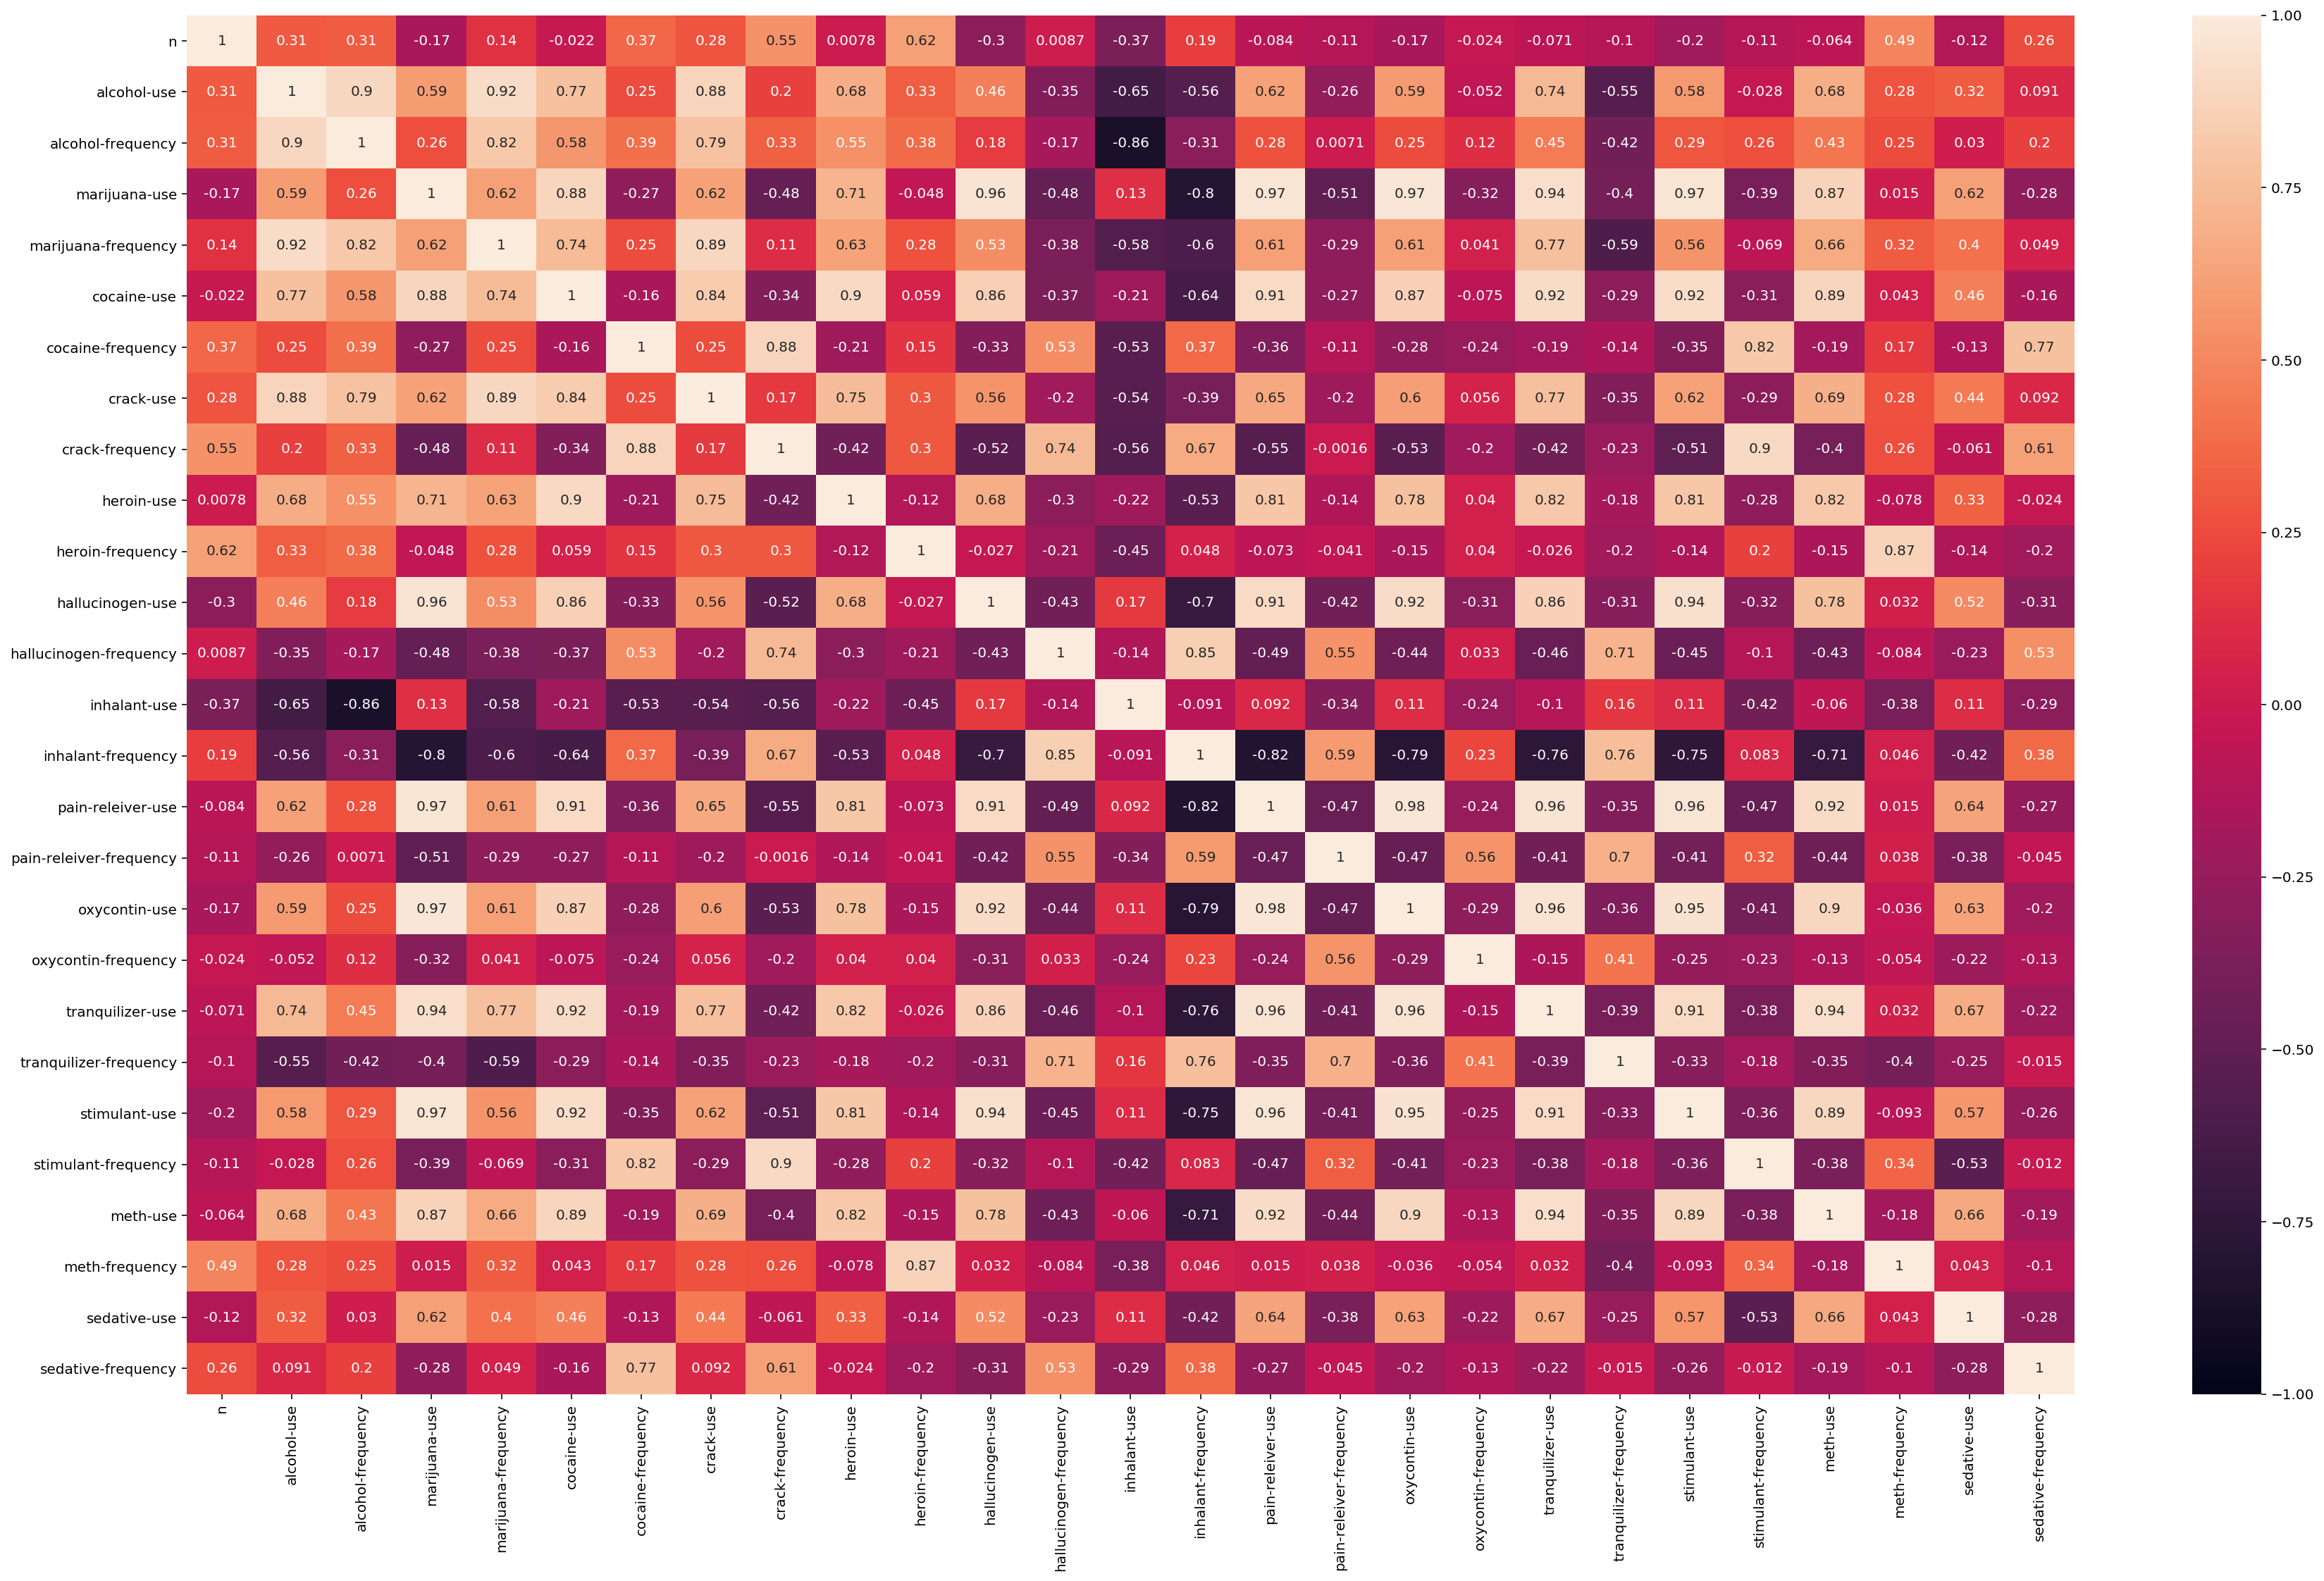

In [106]:
plt.figure(figsize=(30, 18))
sns.heatmap(dfdrugs.corr(), vmin=-1, vmax=1, annot=True)
plt.show()

In [107]:
dfdrugs.describe()

,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,heroin-use,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,16.000000,17.000000,14.000000,17.000000,...,17.000000,16.000000,17.000000,17.000000,17.000000,17.000000,17.000000,15.000000,17.000000,17.000000
mean,3251.058824,55.429412,33.352941,18.923529,42.941176,2.176471,7.875000,0.294118,15.035714,0.352941,...,0.935294,14.812500,2.805882,11.735294,1.917647,31.147059,0.382353,35.966667,0.282353,19.382353
std,1297.890426,26.878866,21.318833,11.959752,18.362566,1.816772,8.038449,0.235772,18.111263,0.333762,...,0.608216,12.798275,1.753379,11.485205,1.407673,85.973790,0.262762,31.974581,0.138000,24.833527
min,2223.000000,3.900000,3.000000,1.100000,4.000000,0.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,3.000000,0.200000,4.500000,0.000000,2.000000,0.000000,2.000000,0.000000,3.000000
25%,2469.000000,40.100000,10.000000,8.700000,30.000000,0.500000,5.000000,0.000000,5.000000,0.100000,...,0.400000,5.750000,1.400000,6.000000,0.600000,7.000000,0.200000,12.000000,0.200000,6.500000
50%,2798.000000,64.600000,48.000000,20.800000,52.000000,2.000000,5.250000,0.400000,7.750000,0.200000,...,1.100000,12.000000,3.500000,10.000000,1.800000,10.000000,0.400000,30.000000,0.300000,10.000000
75%,3058.000000,77.500000,52.000000,28.400000,52.000000,4.000000,7.250000,0.500000,16.500000,0.600000,...,1.400000,18.125000,4.200000,11.000000,3.000000,12.000000,0.600000,47.000000,0.400000,17.500000
max,7391.000000,84.200000,52.000000,34.000000,72.000000,4.900000,36.000000,0.600000,62.000000,1.100000,...,1.700000,46.000000,5.400000,52.000000,4.100000,364.000000,0.900000,105.000000,0.500000,104.000000


In [108]:
use_variables = dfdrugs.iloc[0:, 0::2]
use_variables

,age,alcohol-use,marijuana-use,cocaine-use,crack-use,heroin-use,hallucinogen-use,inhalant-use,pain-releiver-use,oxycontin-use,tranquilizer-use,stimulant-use,meth-use,sedative-use
0,12,3.9,1.1,0.1,0.0,0.1,0.2,1.6,2.0,0.1,0.2,0.2,0.0,0.2
1,13,8.5,3.4,0.1,0.0,0.0,0.6,2.5,2.4,0.1,0.3,0.3,0.1,0.1
2,14,18.1,8.7,0.1,0.0,0.1,1.6,2.6,3.9,0.4,0.9,0.8,0.1,0.2
3,15,29.2,14.5,0.5,0.1,0.2,2.1,2.5,5.5,0.8,2.0,1.5,0.3,0.4
4,16,40.1,22.5,1.0,0.0,0.1,3.4,3.0,6.2,1.1,2.4,1.8,0.3,0.2
5,17,49.3,28.0,2.0,0.1,0.1,4.8,2.0,8.5,1.4,3.5,2.8,0.6,0.5
6,18,58.7,33.7,3.2,0.4,0.4,7.0,1.8,9.2,1.7,4.9,3.0,0.5,0.4
7,19,64.6,33.4,4.1,0.5,0.5,8.6,1.4,9.4,1.5,4.2,3.3,0.4,0.3
8,20,69.7,34.0,4.9,0.6,0.9,7.4,1.5,10.0,1.7,5.4,4.0,0.9,0.5
9,21,83.2,33.0,4.8,0.5,0.6,6.3,1.4,9.0,1.3,3.9,4.1,0.6,0.3


In [109]:
use_variables.corr()

,alcohol-use,marijuana-use,cocaine-use,crack-use,heroin-use,hallucinogen-use,inhalant-use,pain-releiver-use,oxycontin-use,tranquilizer-use,stimulant-use,meth-use,sedative-use
alcohol-use,1.000000,0.594165,0.773458,0.877378,0.677614,0.463702,-0.648248,0.617523,0.589219,0.735785,0.582241,0.682531,0.318268
marijuana-use,0.594165,1.000000,0.883789,0.620670,0.711613,0.959353,0.127336,0.966226,0.971733,0.935199,0.968096,0.870446,0.616766
cocaine-use,0.773458,0.883789,1.000000,0.835727,0.899944,0.855668,-0.214609,0.906638,0.865626,0.920430,0.923954,0.889353,0.461914
crack-use,0.877378,0.620670,0.835727,1.000000,0.750790,0.556222,-0.543499,0.652764,0.603003,0.772651,0.618008,0.694324,0.438421
heroin-use,0.677614,0.711613,0.899944,0.750790,1.000000,0.683674,-0.215961,0.805868,0.775321,0.818583,0.808024,0.816620,0.333649
hallucinogen-use,0.463702,0.959353,0.855668,0.556222,0.683674,1.000000,0.173030,0.909333,0.916777,0.862900,0.940008,0.780071,0.518700
inhalant-use,-0.648248,0.127336,-0.214609,-0.543499,-0.215961,0.173030,1.000000,0.092045,0.110492,-0.103745,0.108381,-0.059903,0.110611
pain-releiver-use,0.617523,0.966226,0.906638,0.652764,0.805868,0.909333,0.092045,1.000000,0.976445,0.959283,0.961484,0.918051,0.636666
oxycontin-use,0.589219,0.971733,0.865626,0.603003,0.775321,0.916777,0.110492,0.976445,1.000000,0.955081,0.947492,0.895790,0.625929
tranquilizer-use,0.735785,0.935199,0.920430,0.772651,0.818583,0.862900,-0.103745,0.959283,0.955081,1.000000,0.909784,0.936270,0.674618


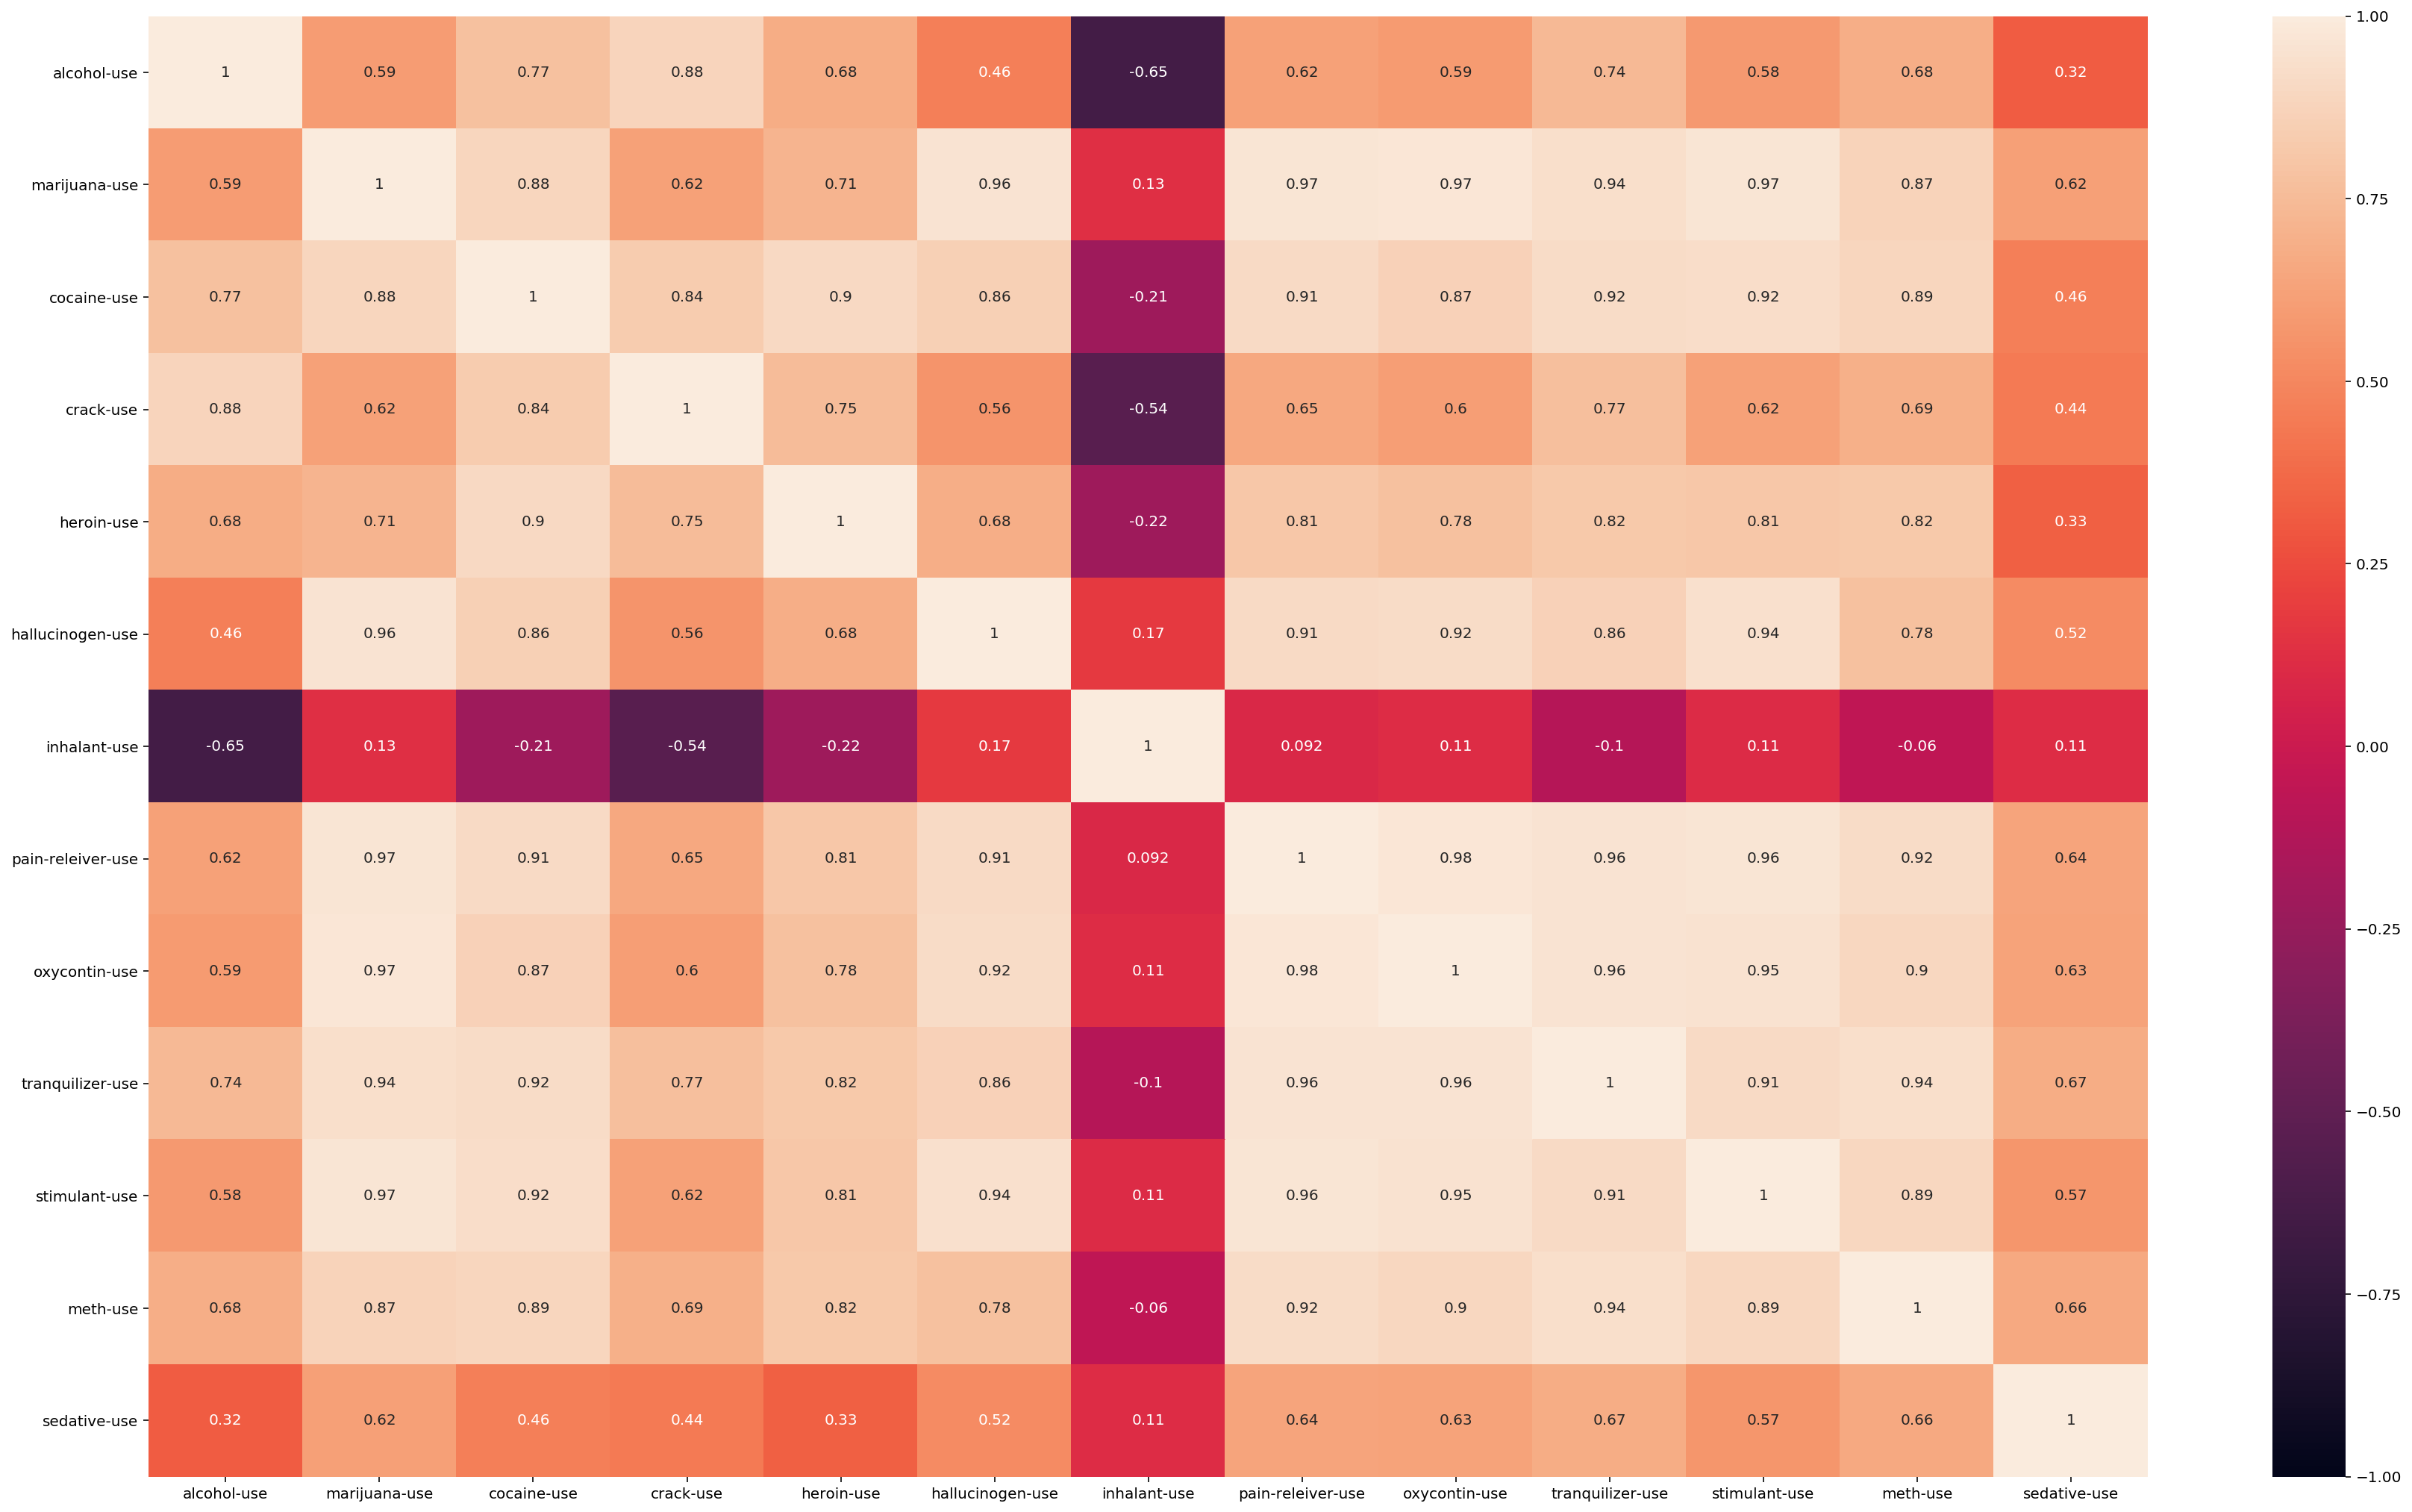

In [110]:
plt.figure(figsize=(30, 18))
sns.heatmap(use_variables.corr(), vmin=-1, vmax=1, annot=True)
plt.show()

In [111]:
use_variables.describe()

,alcohol-use,marijuana-use,cocaine-use,crack-use,heroin-use,hallucinogen-use,inhalant-use,pain-releiver-use,oxycontin-use,tranquilizer-use,stimulant-use,meth-use,sedative-use
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,55.429412,18.923529,2.176471,0.294118,0.352941,3.394118,1.388235,6.270588,0.935294,2.805882,1.917647,0.382353,0.282353
std,26.878866,11.959752,1.816772,0.235772,0.333762,2.792506,0.927283,3.166379,0.608216,1.753379,1.407673,0.262762,0.138000
min,3.900000,1.100000,0.000000,0.000000,0.000000,0.100000,0.000000,0.600000,0.000000,0.200000,0.000000,0.000000,0.000000
25%,40.100000,8.700000,0.500000,0.000000,0.100000,0.600000,0.600000,3.900000,0.400000,1.400000,0.600000,0.200000,0.200000
50%,64.600000,20.800000,2.000000,0.400000,0.200000,3.200000,1.400000,6.200000,1.100000,3.500000,1.800000,0.400000,0.300000
75%,77.500000,28.400000,4.000000,0.500000,0.600000,5.200000,2.000000,9.000000,1.400000,4.200000,3.000000,0.600000,0.400000
max,84.200000,34.000000,4.900000,0.600000,1.100000,8.600000,3.000000,10.000000,1.700000,5.400000,4.100000,0.900000,0.500000


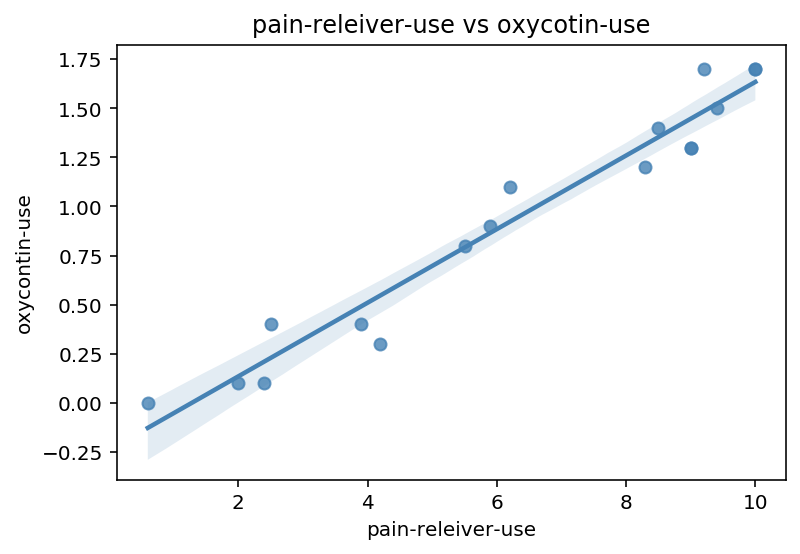

In [112]:
fig, ax = plt.subplots(figsize=(6, 4))

sns.regplot('pain-releiver-use', 'oxycontin-use', data=dfdrugs, 
            fit_reg=True,
            color='steelblue', ax=ax)

ax.set_title('pain-releiver-use vs oxycotin-use')
plt.show()

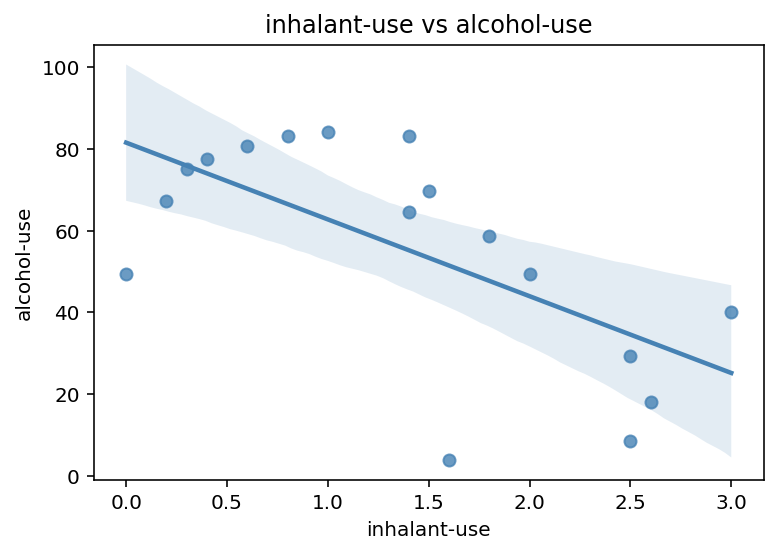

In [113]:
fig, ax = plt.subplots(figsize=(6, 4))

sns.regplot('inhalant-use', 'alcohol-use', data=dfdrugs, 
            fit_reg=True,
            color='steelblue', ax=ax)

ax.set_title('inhalant-use vs alcohol-use')
plt.show()

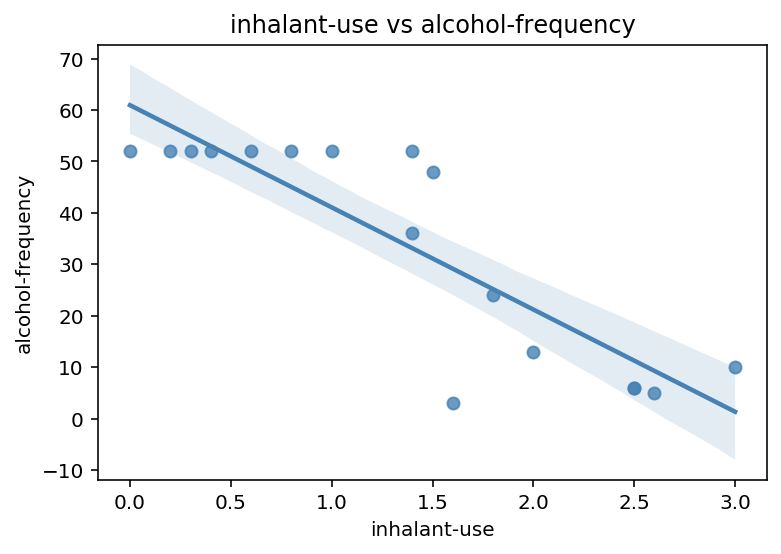

In [114]:
fig, ax = plt.subplots(figsize=(6, 4))

sns.regplot('inhalant-use', 'alcohol-frequency', data=dfdrugs, 
            fit_reg=True,
            color='steelblue', ax=ax)

ax.set_title('inhalant-use vs alcohol-frequency')
plt.show()

In [115]:
#Conclusion: Analysing the entire drugs dataframe and its visuals, I could see: 
#1.The strongest positive correlation is between pain releiver use and oxycotin use with 0.98 score, 
#     therefore the strongest correlation of the entire dataframe
#2.The strongest negative correlation is between inhalant use and alcoholfrequency with -0.86 score

#Analysing the correlation only in regards to drugs use, I could also see:
#1.The strongest negative correlation is between inhalant use and alcohol use with -0.65 score

### 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.


Your hypothesis could be on:

- Difference of group means
- Correlations between variables
- Anything else you think is interesting, testable, and meaningful!

**Important notes:**

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.

** Question and deliverables**


...

In [116]:
#Question:
#What is the type of drug whose users are most likely to also use other drugs?

In [117]:
#Deliverables: 
#Correlation numbers and graphs. Please consider relevant data presented in topic 7.1 and 7.2

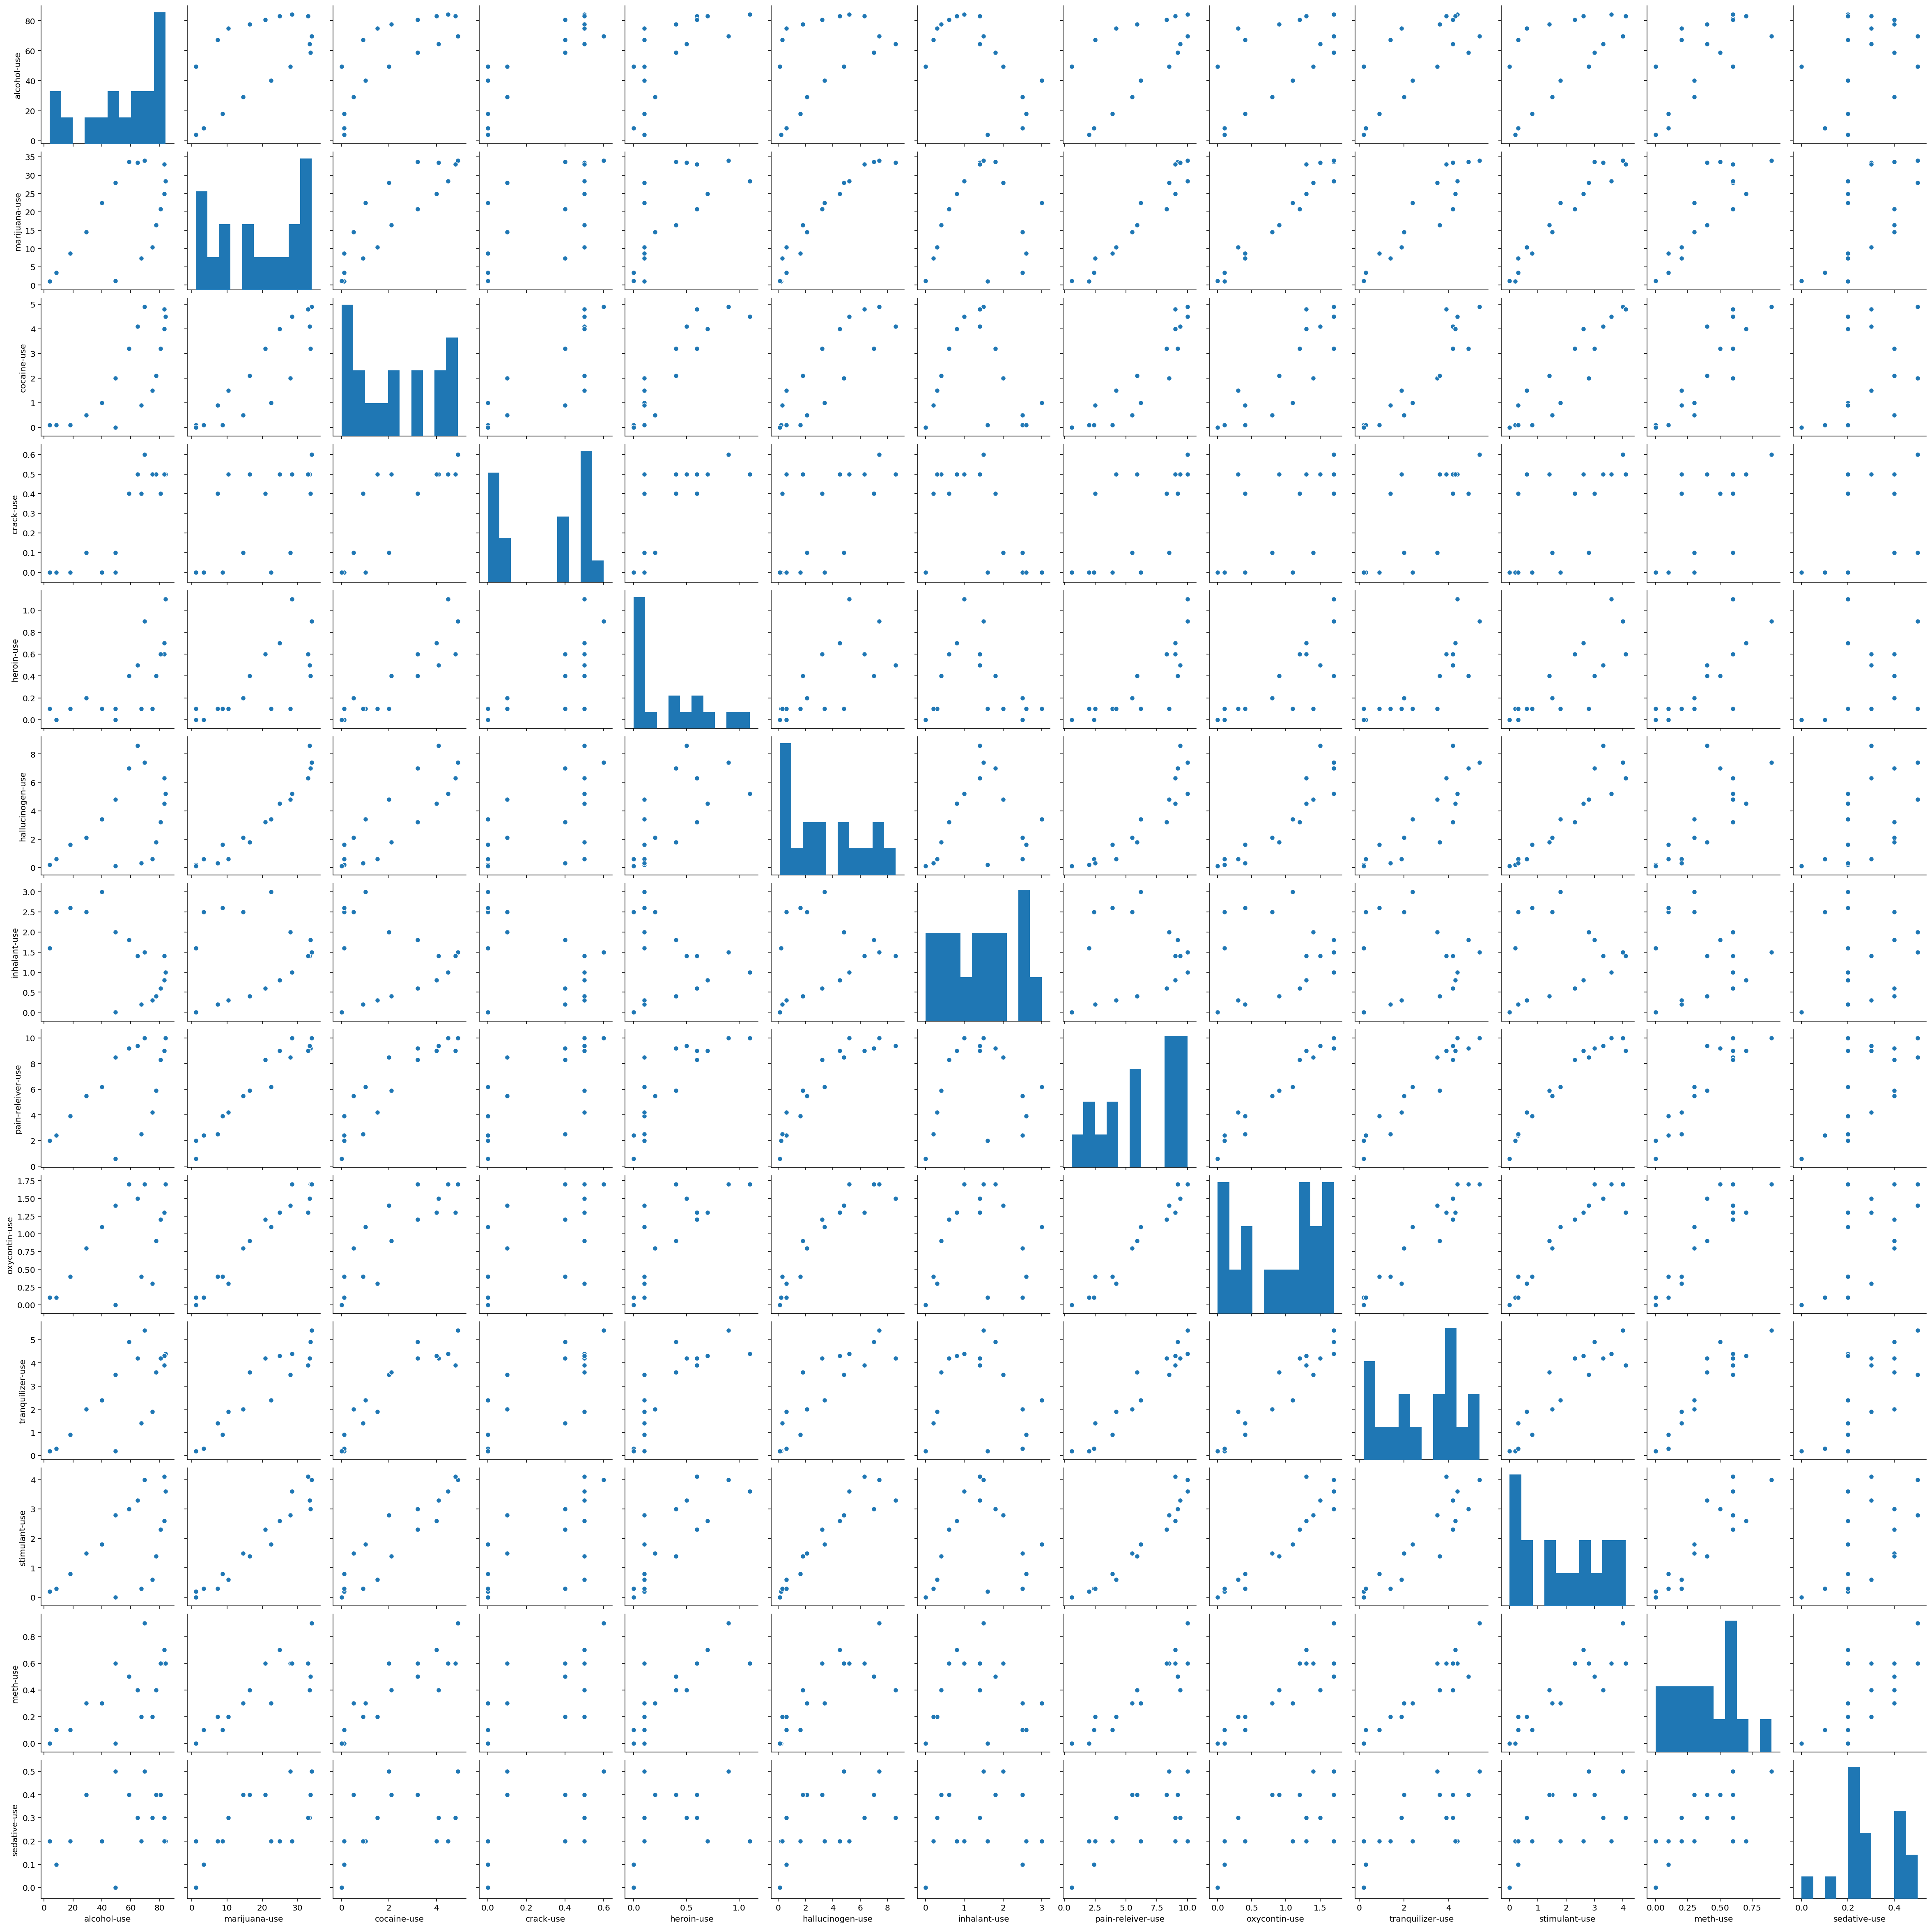

In [118]:
sns.pairplot(use_variables)
plt.show()

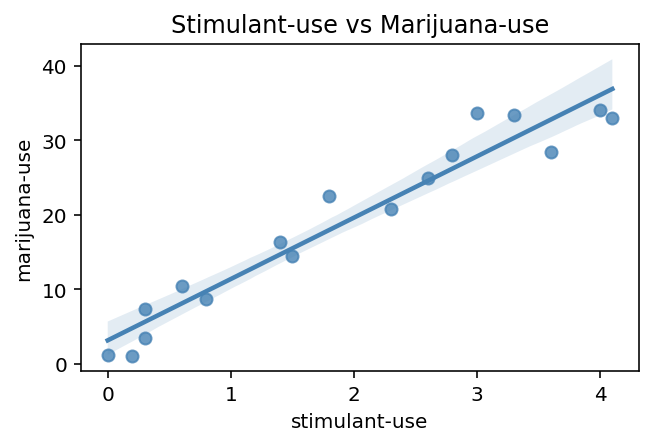

In [119]:
fig, ax = plt.subplots(figsize=(5, 3))

sns.regplot('stimulant-use', 'marijuana-use', data=dfdrugs, 
            fit_reg=True,
            color='steelblue', ax=ax)

ax.set_title('Stimulant-use vs Marijuana-use')
plt.show()

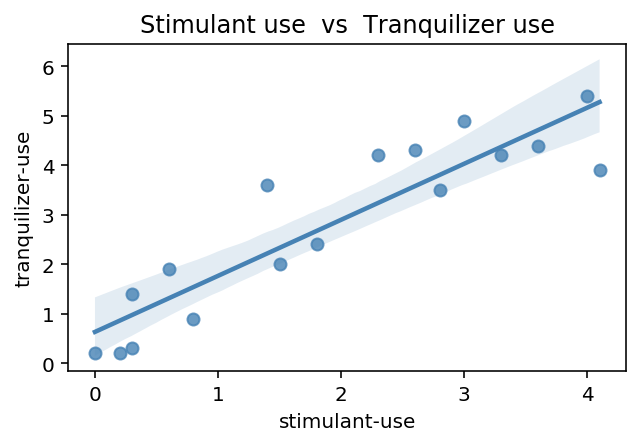

In [120]:
fig, ax = plt.subplots(figsize=(5, 3))

sns.regplot('stimulant-use', 'tranquilizer-use', data=dfdrugs, 
            fit_reg=True,
            color='steelblue', ax=ax)

ax.set_title('Stimulant use  vs  Tranquilizer use')
plt.show()

**Report**



...

In [121]:
#Based on the analysis of the entire question 7, we could see that:
#stimulants use has the higher number of high score correlations: 
#a total of 6 scores higher than 0.9 (
#(the 2 plots presented were chosen considering the strongest and the least strong among those 6 highest scores)


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Introduction to dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. Subjectivity in selecting and analyzing data is a problem that will recur throughout the course.

1. Pull out the rate variable from the sat dataset.
2. Are there outliers in the dataset? Define, in words, how you _numerically define outliers._
3. Print out the outliers in the dataset.
4. Remove the outliers from the dataset.
5. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?

In [122]:
sat_scores[['Rate']].head()

,Rate
0,82
1,81
2,79
3,77
4,72


In [123]:
sat_scores[['Rate']].describe()

,Rate
count,52.000000
mean,37.153846
std,27.301788
min,4.000000
25%,9.000000
50%,33.500000
75%,63.500000
max,82.000000


In [124]:
sat_scores.head()

,State,Rate,Verbal,Math,Diference(Verbal-Math)
0,CT,82,509,510,-1
1,NJ,81,499,513,-14
2,MA,79,511,515,-4
3,NY,77,495,505,-10
4,NH,72,520,516,4


In [125]:
outlier = (63.50-9)*1.5+63.5
outlier

145.25

In [126]:
sat_scores[sat_scores['Rate'] >145.25][['State', 'Rate']]

,State,Rate


In [127]:
outlier = (63.50-9)*0.2+63.5
outlier

74.4

In [128]:
sat_scores.loc[sat_scores['Rate']>74.4, ['State', 'Rate']]

,State,Rate
0,CT,82
1,NJ,81
2,MA,79
3,NY,77


In [129]:
sat_scores_outliers = sat_scores.loc[sat_scores['Rate']<74.4, ['State', 'Rate']]
sat_scores_outliers

,State,Rate
4,NH,72
5,RI,71
6,PA,71
7,VT,69
8,ME,69
9,VA,68
10,DE,67
11,MD,65
12,NC,65
13,GA,63


In [130]:
sat_scores[['Rate']].describe()

,Rate
count,52.000000
mean,37.153846
std,27.301788
min,4.000000
25%,9.000000
50%,33.500000
75%,63.500000
max,82.000000


In [133]:
sat_scores_outliers.describe()


,Rate
count,48.000000
mean,33.604167
std,25.322381
min,4.000000
25%,9.000000
50%,28.500000
75%,56.250000
max,72.000000


In [135]:
sat_scores[['Rate']].describe()

,Rate
count,52.000000
mean,37.153846
std,27.301788
min,4.000000
25%,9.000000
50%,33.500000
75%,63.500000
max,82.000000


In [134]:
#Conclusions
#1:done
#2: not initiallity
#3:done
#4:done
#5:mean, median, and standard deviation of the "cleaned" data without outlier are smaller, since the outlier were high numbers 

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9. Percentile scoring and Spearman rank correlation

---

### 9.1 Calculate the Spearman correlation of sat `Verbal` and `Math`

1. How does the Spearman correlation compare to the Pearson correlation? 
2. Describe clearly in words the process of calculating the Spearman rank correlation.
  - Hint: the word "rank" is in the name of the process for a reason!


### 9.2 Percentile scoring

Look up percentile scoring of data. In other words, the conversion of numeric data to their equivalent percentile scores.

http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

1. Convert `Rate` to percentiles in the sat scores as a new column.
2. Show the percentile of California in `Rate`.
3. How is percentile related to the Spearman rank correlation?

### 9.3 Percentiles and outliers

1. Why might percentile scoring be useful for dealing with outliers?
2. Plot the distribution of a variable of your choice from the drug use dataset.
3. Plot the same variable but percentile scored.
4. Describe the effect, visually, of converting raw scores to percentile.